In [2]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astropy.io import fits
from astropy.io import ascii

In [3]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')
from astroplan import EclipsingSystem
from astropy.timeseries import LombScargle

In [4]:
lightcurve_ztf = Table.from_pandas(pd.read_csv("J163045.csv"))

In [5]:
row = lightcurve_ztf
hjd = np.array(row["mjd"])
hjd = hjd.astype("float")
hjd = hjd * u.day
mag = np.array(row["mag"])
for i in range(len(mag)):
    if(">" in str(mag[i])):
        mag[i] = mag[i][1:-1]
mag = np.asarray(mag)
mag = mag.astype("float")
mag = mag * u.mag
mag_err = np.array(row["magerr"])
mag_err = mag_err.astype("float")
mag_err = mag_err * u.mag

In [6]:
ztf_period = 0.110375275900
ztf_frequency = 1/ztf_period
ztf_frequency

9.06000000313476

In [7]:
ideal_frequency = np.linspace(2, 4, 10**6) * (1/u.day)

In [8]:
power = LombScargle(hjd, mag , mag_err).power(ideal_frequency)

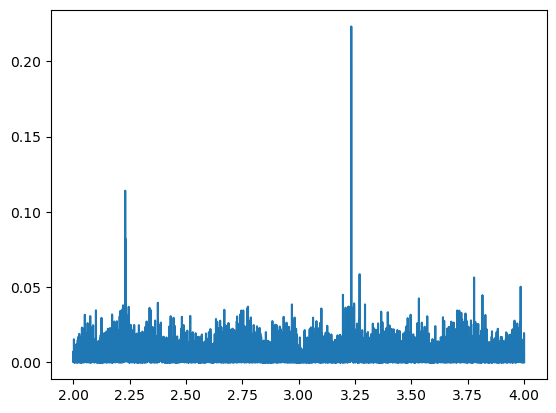

In [9]:
plt.plot(ideal_frequency, power)
#plt.vlines(ztf_frequency, 0, np.max(power), color = "red")

In [10]:
ztf_f = ideal_frequency[np.argmax(power)]
ztf_p = 1/ztf_f
ztf_p

<Quantity 0.30930017 d>

Text(0, 0.5, 'R Mag')

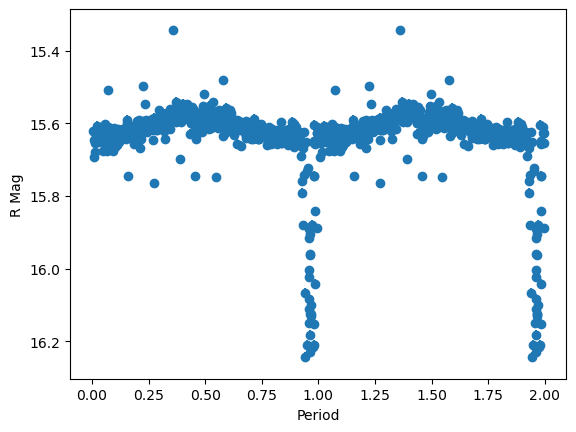

In [11]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
#plt.xlim(0.9,1.02)
#plt.ylim(15, 16.3)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

Text(0, 0.5, 'R Mag')

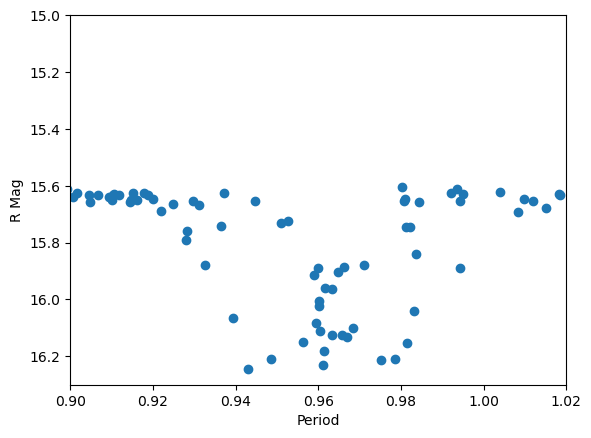

In [17]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
plt.xlim(0.9,1.02)
plt.ylim(15, 16.3)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

In [12]:
eclipsing = lightcurve_ztf[np.argmax(lightcurve_ztf["mag"])]
eclipsing

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64
584205200022855,161831519,2459372.8197641,59372.3151968,16.2437363,0.0131802373,32768,zr,247.68938,18.0223376,0.800000012,-0.0680000037,20210607315174,584,5,2,20.4300003,25.3735657,0.063891605,0.088761084,4.8285925e-05,30.0,1.038,2


In [13]:
primary_eclipse_time = Time(eclipsing["mjd"], format='mjd')
orbital_period = ztf_p
eclipse_duration = 0.06 * ztf_p
eclipse_duration

<Quantity 0.01855801 d>

In [14]:
objects = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='J163045')
np.save("J163045", np.array([objects]))

In [15]:
observing_time = Time('2023-05-05 4:00')
objects.next_primary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 04:02:36.762' '2023-05-05 11:28:00.297'
 '2023-05-05 18:53:23.832' '2023-05-06 02:18:47.367'
 '2023-05-06 09:44:10.901' '2023-05-06 17:09:34.436'
 '2023-05-07 00:34:57.971' '2023-05-07 08:00:21.505']>

In [16]:
objects.next_secondary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 07:45:18.530' '2023-05-05 15:10:42.064'
 '2023-05-05 22:36:05.599' '2023-05-06 06:01:29.134'
 '2023-05-06 13:26:52.669' '2023-05-06 20:52:16.203'
 '2023-05-07 04:17:39.738' '2023-05-07 11:43:03.273']>